<a href="https://colab.research.google.com/github/cal546/DSPS_CAdkins/blob/main/HW%26/Hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv')

In [ ]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
genes = genes.replace(np.nan,0)

In [ ]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
genes.describe(include='all')

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1302.000000,-0.074268,-0.005045,0.005219,-0.079438,-0.042794,0.015155,-0.059323,-0.039752,-0.087955,0.000902,-0.041196,-0.015011,-0.034671,-0.112678,-0.048054,-0.012752,-0.002154,-0.023367,-0.008875,-0.043155,-0.010581,-0.046811,-0.017211,-0.018590,-0.064079,-0.019147,-0.013585,-0.050063,-0.005275,-0.012560,-0.020898,0.000760,0.024497,-0.113130,-0.029816,-0.061747,-0.013784,-0.023055,-0.029884,-0.003804,-0.054331,-0.002722,-0.039019,-0.017282,-0.030968,-0.004381,-0.053031,-0.068655,-0.009356,-0.075643,-0.093582,-0.033879,-0.112131,-0.074936,-0.014100,-0.071221,0.035653,-0.008712,-0.017188,-0.200518,-0.037920,-0.015478,-0.019791,-0.031696,-0.038389,-0.032749,-0.001378,-0.022440,0.026088,-0.064163,-0.027909,0.007933,-0.114121,-0.010696
std,751.565699,0.493931,0.346347,0.331848,0.692972,0.428889,0.339398,0.380021,0.351449,0.455828,0.345493,0.362652,0.447326,0.540023,0.580710,0.496429,0.543310,0.465740,0.387973,0.397993,0.425933,0.403002,0.451837,0.428721,0.336734,0.462704,0.488533,0.407510,0.466957,0.371654,0.383568,0.406357,0.441748,0.378560,0.629854,0.416718,0.493810,0.442967,0.431225,0.421327,0.532112,0.397971,0.461630,0.483841,0.392481,0.403270,0.448786,0.492328,0.461591,0.386811,0.410759,0.560007,0.405424,0.514023,0.543941,0.397531,0.356972,0.409064,0.434887,0.381757,0.653187,0.359094,0.346599,0.424965,0.428500,0.484009,0.405532,0.317725,0.353879,0.395065,0.397707,0.457160,0.493781,0.533659,0.335631
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,651.500000,-0.378801,-0.212649,-0.179065,-0.506899,-0.275926,-0.144605,-0.309324,-0.234284,-0.332753,-0.210667,-0.261666,-0.280333,-0.321668,-0.392210,-0.350457,-0.324113,-0.252442,-0.238936,-0.230974,-0.293005,-0.216682,-0.316262,-0.260357,-0.224408,-0.316094,-0.285244,-0.246731,-0.343752,-0.203948,-0.234600,-0.254842,-0.243285,-0.138682,-0.494049,-0.292044,-0.339097,-0.277419,-0.293264,-0.261327,-0.314635,-0.284414,-0.278122,-0.345027,-0.203877,-0.271830,-0.286189,-0.351270,-0.325687,-0.191760,-0.297844,-0.431803,-0.271369,-0.418967,-0.390821,-0.261348,-0.272755,-0.166693,-0.298024,-0.221690,-0.596808,-0.228987,-0.194894,-0.265199,-0.281862,-0.321856,-0.277490,-0.170230,

In [ ]:
scaledgenes =  skl.preprocessing.scale(genes, axis=0)

In [ ]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,
         0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,
         0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
twodproj = skl.manifold.TSNE().fit_transform(scaledgenes)

In [ ]:
twodproj.shape

(2603, 2)

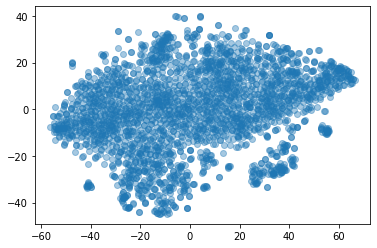

In [ ]:
pl.scatter(twodproj[:,0],twodproj[:,1],alpha=0.4)

In [ ]:
kmeans  = skl.cluster.KMeans(n_clusters=2).fit(twodproj)

In [61]:
def edistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=1))

def calcICVar(X, labels, model):
  n_clusters = np.unique(labels).shape[0] # for every cluster, i.e. for every different label
  print(n_clusters)
  icv = np.zeros(n_clusters) #create a container for the intraclustervariance
  for i in range(n_clusters):
    icv[i] = ((edistance(model.cluster_centers_[i], X[labels==i])**2).sum() / ((labels == i).sum() - 1)).sum()
    #print(icv)
  return(icv.sum())

In [ ]:
calcICVar(twodproj, kmeans.labels_, kmeans)

2


1046.0322712136272

In [ ]:
#one cluster
for i in range(1,11):
  kmeans  = skl.cluster.KMeans(n_clusters=i).fit(twodproj)
  print(calcICVar(twodproj, kmeans.labels_, kmeans))

1
1175.2642198308993
2
1046.0322712136272
3
1136.2066808167615
4
1072.4759176301307
5
1067.3628318961728
6
1067.7563237076665
7
1057.4140325065414
8
1078.845492868193
9
1046.6230921222748
10
1045.8795895599085


8 clusters is optimal as 8 clusers gives the minimum intercluster variance for clusters between 1 and 10

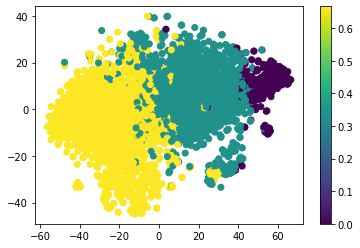

In [ ]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();

3 clusters

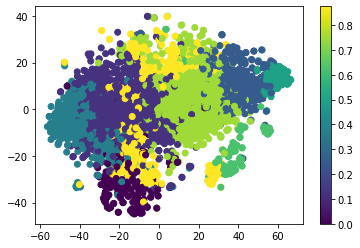

In [ ]:
geneclustersKM = cluster.KMeans(n_clusters=8).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();

In [103]:
geneclustersKM.labels_/ geneclustersKM.n_clusters

array([0.875, 0.875, 0.75 , ..., 0.25 , 0.75 , 0.875])

the optimal 8 clusters

In [68]:
M = np.zeros((2603,2603))
for i in range(len(twodproj)):
  for j in range(len(twodproj)):
    if (i==j):
      M[i,j] = 0
    if (i > j):
      M[i,j] = M[j,i]
    else:
      M[i,j] = eudistance(twodproj[i],twodproj[j])

In [67]:
def eudistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=0))

In [37]:
clustering = skl.cluster.DBSCAN().fit(twodproj)
print(clustering)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


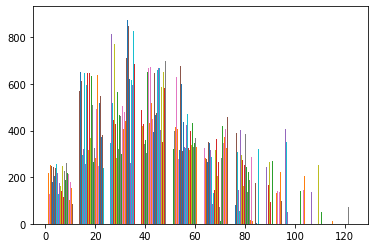

In [87]:
pl.hist(skl.metrics.pairwise_distances(twodproj));

8 or 9 distinct groups with gaps of zero seperating them

In [136]:
clustering = skl.cluster.DBSCAN(min_samples=8,eps=3.3,metric='precomputed')
clustering.fit(M)

DBSCAN(algorithm='auto', eps=3.3, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

7


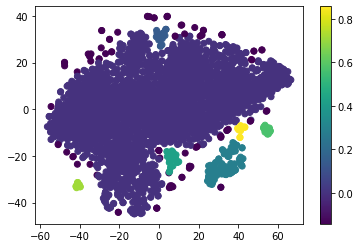

In [139]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=clustering.labels_/(np.max(clustering.labels_)+1))
pl.colorbar();
print((np.max(clustering.labels_)+1))

we have 7 different clusters with a few outliers all around the edges

In [ ]:
jhfrom scipy.cluster.hierarchy import dendrogram, linkage

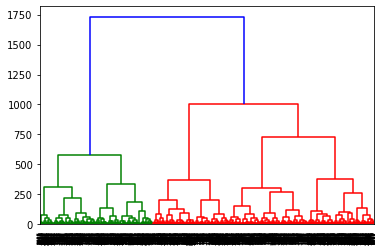

In [ ]:
dn = dendrogram(linkage(twodproj,'ward'))
pl.show()

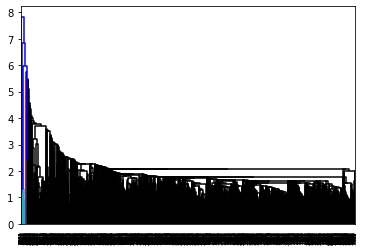

In [30]:
dn = dendrogram(linkage(twodproj,'single'))
pl.show()